<h2> Automatic filtering </h2> 

In [7]:
# import packages
import csv
import pandas as pd
import re
from bs4 import BeautifulSoup
import requests
import os
import numpy as np
import string
import math
from nltk import ngrams
import PyPDF2
import json
import time
import seaborn as sns
from matplotlib import pyplot as plt
import shutil
from nltk import word_tokenize

In [8]:
# import internal modules
import file_path_management as fpath
import public_library as plib
import extract_info
import parameters as params
import download_and_process_pdf as dpp

<h3> Predefined fucntions: </h3> 

In [9]:
def count_word_from_text(text, word): 
    if word in params.token_word_list:
        tokens = word_tokenize(text)

        len_word = len(word.split())
        
        # get the words of length len_word from text
        ng = list(ngrams(tokens, len_word))
        words = [' '.join(gram) for gram in ng]
        # print(words)

        count = 0
        for w in words:
            if word == w:
                count += 1
    else:
        count = text.count(word)

    return count
# --------------------start of test code--------------------
# text = 'This all.6 apple 6i7s very_tasty？、 apple 6i7s 2but-the banana this is not delicious at Is all.6'
# # text = "Distribution of the dopamine innervation in the macaque and human thalamus Miguel Ángel García-Cabezas,aBeatriz Rico,a,b Miguel Ángel Sánchez-González,aand Carmen Cavadaa,⁎ aDepartamento de Anatomía, Histología y Neurociencia, Facultad de Medicina, Universidad Autónoma de Madrid, C/Arzobispo Morcillo s/n, 28029 Madrid, Spain bInstituto de Neurociencias de Alicante, Universidad Miguel Hernández-CSIC, 03550 Sant Joan d ’Alacant, Spain Received 19 April 2006; revised 8 June 2006; accepted 11 July 2006 Available online 30 November 2006 We recently defined the thalamic dopaminergic system in primates; it arises from numerous dopaminergic cell groups and selectively targetsnumerous thalamic nuclei. Given the central position of the thalamus in subcortical and cortical interplay, and the functional relevance of dopamine neuromodulation in the brain, detailing dopamine dis-tribution in the thalamus should supply important information. Tothis end we performed immunohistochemistry for dopamine and the dopamine transporter in the thalamus of macaque monkeys and humans to generate maps, in the stereotaxic coronal plane, of thedistribution of dopaminergic axons. The dopamine innervation of the thalamus follows the same pattern in both species and is most dense in midline limbic nuclei, the mediodorsal and lateral posteriorassociation nuclei, and in the ventral lateral and ventral anteriormotor nuclei. This distribution suggests that thalamic dopamine has a prominent role in emotion, attention, cognition and complex somatosensory and visual processing, as well as in motor control.Most thalamic dopaminergic axons are thin and varicose and targetboth the neuropil and small blood vessels, suggesting that, besides neuronal modulation, thalamic dopamine may have a direct influence on microcirculation. The maps provided here should be a usefulreference in future experimental and neuroimaging studies aiming atclarifying the role of the thalamic dopaminergic system in health and in conditions involving brain dopamine, including Parkinson ’s disease, drug addiction and schizophrenia.© 2006 Elsevier Inc. All rights reserved. Keywords: Dopamine; Thalamus; Monkey; Human; Primate; Dopamine transporter; Parkinson; Schizophrenia; AddictionIntroduction The thalamus is made up of multiple nuclei relaying information from subcortical centers or from other cortices to the cerebral cortex (Sherman and Guillery, 2005 ), as well as the striatum, the nucleus accumbens and the amygdala ( Steriade et al., 1997 ). In addition to specific subcortical and cortical afferents, the primate thalamus receives axons containing the neuromodulators acetylcholine (Heckers et al., 1992 ), histamine ( Manning et al., 1996 ), serotonin (Morrison and Foote, 1986; Lavoie and Parent, 1991 ), and the catecholamines adrenaline ( Rico and Cavada, 1998a ), noradrenaline (Morrison and Foote, 1986; Ginsberg et al., 1993 ) and dopamine (Sánchez-González et al., 2005 ). Until recently, the existence of significant dopamine innervation in the primate thalamus has been largely ignored, probably becausedopamine innervation of the rodent thalamus is very scant(Groenewegen, 1988; Papadopoulos and Parnavelas, 1990 ). However, fragmentary data scattered through the literature endorse the presence of dopamine innervation in the primate thalamus.Postmortem biochemical studies showed the presence of dopamine in the thalamus of macaques ( Brown et al., 1979; Goldman-Rakic and Brown, 1981; Pifl et al., 1990, 1991 ) and human subjects ( Oke and Adams, 1987 ). Later, receptor binding and in situ hybridization analyses detected the presence of dopamine D2-like ( Joyce et al., 1991; Kessler et al., 1993; Hall et al., 1996; Langer et al., 1999;Rieck et al., 2004 ) and D3-like receptors ( Gurevich and Joyce, 1999 ) in several human thalamic nuclei. Positron emission tomography (PET) radioligand studies have also demonstratedthe presence of the dopamine transporter (DAT) ( Wang et al., 1995; Halldin et al., 1996; Helfenbein et al., 1999; Brownell et al., 2003 ) and of D2-like receptors ( Farde et al., 1997; Langer et al., 1999; Okubo et al., 1999; Brownell et al., 2003; Rieck et al., 2004 ) in the human and macaque thalamus. In the course of PET studies focusing on schizophrenia, D2- and D3-like radioligand binding was also found in the thalamus of control subjects ( Talvik et al., 2003; Yasuno et al., 2004 ). Finally, an immunohistochemical study using anti-DAT antibodies detected the presence of dopaminergic www.elsevier.com/locate/ynimg NeuroImage 34 (2007) 965 –984 ⁎Corresponding author. Fax: +34 91 497 53 15. E-mail address: carmen.cavada@uam.es (C. Cavada). Available online on ScienceDirect (www.sciencedirect.com). 1053-8119/$ - see front matter © 2006 Elsevier Inc. All rights reserved. doi:10.1016/j.neuroimage.2006.07.032"
# keyword = 'apple 6i7s'
# count = count_word_from_text(text, keyword)
# print(count)
# ---------------------end of test code---------------------

In [10]:
def process_text(text, lower):
    # keep only ascii characters
    text = text.encode('ascii', 'ignore').decode('ascii') 

    # remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip() 

    # convert to lower case
    if lower == True:
        text = text.lower()
    elif lower == False:
        pass
    else:
        raise ValueError('lower must be assigned True or False.')

    return text
# --------------------start of test code--------------------
# # text = 'Vision for-actio,,,,,n: thalamic and cortical inputs,,$ to the macaque superior tract neural tracing. Parietal lobule The dorsal visual stream, the cortical circuit that in the primate brain is mainly dedicated to the visual control of actions, is split into two routes, a lateral and a medial one, both involved in coding different aspects of sensorimotor control of actions. The lateral route, named "lateral grasping network", is mainly involved in the control of the distal part of prehension, namely grasping and manipulation. The medial route, named "reach-to-grasp network", is involved in the control of the full deployment of prehension act, from the direction of arm movement to the shaping of the hand according to the object to be grasped. In macaque monkeys, the reach-to-grasp network (the target of this review) includes areas of the superior parietal lobule (SPL) that hosts visual and somatosensory neurons well suited to control goal-directed limb movements toward stationary as well as moving objects. After a brief summary of the neuronal functional properties of these areas, we will analyze their cortical and thalamic inputs thanks to retrograde neuronal tracers separately injected into the SPL areas V6, V6A, PEc, and PE. These areas receive visual and somatosensory information distributed in a caudorostral, visuosomatic trend, and some of them are directly connected with the dorsal premotor cortex. This review is particularly focused on the origin and type of visual information reaching the SPL, and on the functional role this information can play in guiding limb interaction with objects in structured and dynamic environments. Area PEc; Area V6; Area V6A; Dorsal visual stream; Goal-directed arm movement; Sensorimotor integration.'
# text = "Distribution of the dopamine innervation in the macaque and human thalamus Miguel Ángel García-Cabezas,aBeatriz Rico,a,b Miguel Ángel Sánchez-González,aand Carmen Cavadaa,⁎ aDepartamento de Anatomía, Histología y Neurociencia, Facultad de Medicina, Universidad Autónoma de Madrid, C/Arzobispo Morcillo s/n, 28029 Madrid, Spain bInstituto de Neurociencias de Alicante, Universidad Miguel Hernández-CSIC, 03550 Sant Joan d ’Alacant, Spain Received 19 April 2006; revised 8 June 2006; accepted 11 July 2006 Available online 30 November 2006 We recently defined the thalamic dopaminergic system in primates; it arises from numerous dopaminergic cell groups and selectively targetsnumerous thalamic nuclei. Given the central position of the thalamus in subcortical and cortical interplay, and the functional relevance of dopamine neuromodulation in the brain, detailing dopamine dis-tribution in the thalamus should supply important information. Tothis end we performed immunohistochemistry for dopamine and the dopamine transporter in the thalamus of macaque monkeys and humans to generate maps, in the stereotaxic coronal plane, of thedistribution of dopaminergic axons. The dopamine innervation of the thalamus follows the same pattern in both species and is most dense in midline limbic nuclei, the mediodorsal and lateral posteriorassociation nuclei, and in the ventral lateral and ventral anteriormotor nuclei. This distribution suggests that thalamic dopamine has a prominent role in emotion, attention, cognition and complex somatosensory and visual processing, as well as in motor control.Most thalamic dopaminergic axons are thin and varicose and targetboth the neuropil and small blood vessels, suggesting that, besides neuronal modulation, thalamic dopamine may have a direct influence on microcirculation. The maps provided here should be a usefulreference in future experimental and neuroimaging studies aiming atclarifying the role of the thalamic dopaminergic system in health and in conditions involving brain dopamine, including Parkinson ’s disease, drug addiction and schizophrenia.© 2006 Elsevier Inc. All rights reserved. Keywords: Dopamine; Thalamus; Monkey; Human; Primate; Dopamine transporter; Parkinson; Schizophrenia; AddictionIntroduction The thalamus is made up of multiple nuclei relaying information from subcortical centers or from other cortices to the cerebral cortex (Sherman and Guillery, 2005 ), as well as the striatum, the nucleus accumbens and the amygdala ( Steriade et al., 1997 ). In addition to specific subcortical and cortical afferents, the primate thalamus receives axons containing the neuromodulators acetylcholine (Heckers et al., 1992 ), histamine ( Manning et al., 1996 ), serotonin (Morrison and Foote, 1986; Lavoie and Parent, 1991 ), and the catecholamines adrenaline ( Rico and Cavada, 1998a ), noradrenaline (Morrison and Foote, 1986; Ginsberg et al., 1993 ) and dopamine (Sánchez-González et al., 2005 ). Until recently, the existence of significant dopamine innervation in the primate thalamus has been largely ignored, probably becausedopamine innervation of the rodent thalamus is very scant(Groenewegen, 1988; Papadopoulos and Parnavelas, 1990 ). However, fragmentary data scattered through the literature endorse the presence of dopamine innervation in the primate thalamus.Postmortem biochemical studies showed the presence of dopamine in the thalamus of macaques ( Brown et al., 1979; Goldman-Rakic and Brown, 1981; Pifl et al., 1990, 1991 ) and human subjects ( Oke and Adams, 1987 ). Later, receptor binding and in situ hybridization analyses detected the presence of dopamine D2-like ( Joyce et al., 1991; Kessler et al., 1993; Hall et al., 1996; Langer et al., 1999;Rieck et al., 2004 ) and D3-like receptors ( Gurevich and Joyce, 1999 ) in several human thalamic nuclei. Positron emission tomography (PET) radioligand studies have also demonstratedthe presence of the dopamine transporter (DAT) ( Wang et al., 1995; Halldin et al., 1996; Helfenbein et al., 1999; Brownell et al., 2003 ) and of D2-like receptors ( Farde et al., 1997; Langer et al., 1999; Okubo et al., 1999; Brownell et al., 2003; Rieck et al., 2004 ) in the human and macaque thalamus. In the course of PET studies focusing on schizophrenia, D2- and D3-like radioligand binding was also found in the thalamus of control subjects ( Talvik et al., 2003; Yasuno et al., 2004 ). Finally, an immunohistochemical study using anti-DAT antibodies detected the presence of dopaminergic www.elsevier.com/locate/ynimg NeuroImage 34 (2007) 965 –984 ⁎Corresponding author. Fax: +34 91 497 53 15. E-mail address: carmen.cavada@uam.es (C. Cavada). Available online on ScienceDirect (www.sciencedirect.com). 1053-8119/$ - see front matter © 2006 Elsevier Inc. All rights reserved. doi:10.1016/j.neuroimage.2006.07.032"
# text = process_text(text, lower=False)
# print(text)
# ---------------------end of test code---------------------

In [11]:
def count_kw_group_from_text(text_tak, text_txt, keyword_group):
    if text_txt == text_txt and text_txt != "": # if full text is available, use full text
        text = text_txt
    elif text_tak == text_tak and text_tak != "": # if full text is not available, use tak (title + abstract + keywords)
        text = text_tak
    else:
        raise ValueError('text_tak and text_txt cannot both be np.nan.')

    # process the text
    text = process_text(text, lower=True)

    # length_text = len(text.split())

    # count the number of keywords
    word_count = 0
    for word in keyword_group:
        word_count = word_count + count_word_from_text(text, word)

    return word_count
# --------------------start of test code--------------------
# text_tak = 'Virhesussion Rhesus for rhesus action: thalamic and cortical inputs to the macaque superior tract neural tracing, parietal lobule The dorsal visual stream, the cortical circuit that in the primate brain is mainly dedicated to the visual control of actions, is split into two routes, a lateral and a medial one, both involved in coding different aspects of sensorimotor control of actions. The lateral route, named "lateral grasping network", is mainly involved in the control of the distal part of prehension, namely grasping and manipulation. The medial route, named "reach-to-grasp network", is involved in the control of the full deployment of prehension act, from the direction of arm movement to the shaping of the hand according to the object to be grasped. In macaque monkeys, the reach-to-grasp network (the target of this review) includes areas of the superior parietal lobule (SPL) that hosts visual and somatosensory neurons well suited to control goal-directed limb movements toward stationary as well as moving objects. After a brief summary of the neuronal functional properties of these areas, we will analyze their cortical and thalamic inputs thanks to retrograde neuronal tracers separately injected into the SPL areas V6, V6A, PEc, and PE. These areas receive visual and somatosensory information distributed in a caudorostral, visuosomatic trend, and some of them are directly connected with the dorsal premotor cortex. This review is particularly focused on the origin and type of visual information reaching the SPL, and on the functional role this information can play in guiding limb interaction with objects in structured and dynamic environments. Area PEc; Area V6; Area V6A; Dorsal visual stream; Goal-directed arm movement; Sensorimotor integration.'
# # text_txt = "rhesusSDistrirhesusbution rhesus of the dopamine innervation in the macaque and human thalamus Miguel Ángel García-Cabezas,aBeatriz Rico,a,b Miguel Ángel Sánchez-González,aand Carmen Cavadaa,⁎ aDepartamento de Anatomía, Histología y Neurociencia, Facultad de Medicina, Universidad Autónoma de Madrid, C/Arzobispo Morcillo s/n, 28029 Madrid, Spain bInstituto de Neurociencias de Alicante, Universidad Miguel Hernández-CSIC, 03550 Sant Joan d ’Alacant, Spain Received 19 April 2006; revised 8 June 2006; accepted 11 July 2006 Available online 30 November 2006 We recently defined the thalamic dopaminergic system in primates; it arises from numerous dopaminergic cell groups and selectively targetsnumerous thalamic nuclei. Given the central position of the thalamus in subcortical and cortical interplay, and the functional relevance of dopamine neuromodulation in the brain, detailing dopamine dis-tribution in the thalamus should supply important information. Tothis end we performed immunohistochemistry for dopamine and the dopamine transporter in the thalamus of macaque monkeys and humans to generate maps, in the stereotaxic coronal plane, of thedistribution of dopaminergic axons. The dopamine innervation of the thalamus follows the same pattern in both species and is most dense in midline limbic nuclei, the mediodorsal and lateral posteriorassociation nuclei, and in the ventral lateral and ventral anteriormotor nuclei. This distribution suggests that thalamic dopamine has a prominent role in emotion, attention, cognition and complex somatosensory and visual processing, as well as in motor control.Most thalamic dopaminergic axons are thin and varicose and targetboth the neuropil and small blood vessels, suggesting that, besides neuronal modulation, thalamic dopamine may have a direct influence on microcirculation. The maps provided here should be a usefulreference in future experimental and neuroimaging studies aiming atclarifying the role of the thalamic dopaminergic system in health and in conditions involving brain dopamine, including Parkinson ’s disease, drug addiction and schizophrenia.© 2006 Elsevier Inc. All rights reserved. Keywords: Dopamine; Thalamus; Monkey; Human; Primate; Dopamine transporter; Parkinson; Schizophrenia; AddictionIntroduction The thalamus is made up of multiple nuclei relaying information from subcortical centers or from other cortices to the cerebral cortex (Sherman and Guillery, 2005 ), as well as the striatum, the nucleus accumbens and the amygdala ( Steriade et al., 1997 ). In addition to specific subcortical and cortical afferents, the primate thalamus receives axons containing the neuromodulators acetylcholine (Heckers et al., 1992 ), histamine ( Manning et al., 1996 ), serotonin (Morrison and Foote, 1986; Lavoie and Parent, 1991 ), and the catecholamines adrenaline ( Rico and Cavada, 1998a ), noradrenaline (Morrison and Foote, 1986; Ginsberg et al., 1993 ) and dopamine (Sánchez-González et al., 2005 ). Until recently, the existence of significant dopamine innervation in the primate thalamus has been largely ignored, probably becausedopamine innervation of the rodent thalamus is very scant(Groenewegen, 1988; Papadopoulos and Parnavelas, 1990 ). However, fragmentary data scattered through the literature endorse the presence of dopamine innervation in the primate thalamus.Postmortem biochemical studies showed the presence of dopamine in the thalamus of macaques ( Brown et al., 1979; Goldman-Rakic and Brown, 1981; Pifl et al., 1990, 1991 ) and human subjects ( Oke and Adams, 1987 ). Later, receptor binding and in situ hybridization analyses detected the presence of dopamine D2-like ( Joyce et al., 1991; Kessler et al., 1993; Hall et al., 1996; Langer et al., 1999;Rieck et al., 2004 ) and D3-like receptors ( Gurevich and Joyce, 1999 ) in several human thalamic nuclei. Positron emission tomography (PET) radioligand studies have also demonstratedthe presence of the dopamine transporter (DAT) ( Wang et al., 1995; Halldin et al., 1996; Helfenbein et al., 1999; Brownell et al., 2003 ) and of D2-like receptors ( Farde et al., 1997; Langer et al., 1999; Okubo et al., 1999; Brownell et al., 2003; Rieck et al., 2004 ) in the human and macaque thalamus. In the course of PET studies focusing on schizophrenia, D2- and D3-like radioligand binding was also found in the thalamus of control subjects ( Talvik et al., 2003; Yasuno et al., 2004 ). Finally, an immunohistochemical study using anti-DAT antibodies detected the presence of dopaminergic www.elsevier.com/locate/ynimg NeuroImage 34 (2007) 965 –984 ⁎Corresponding author. Fax: +34 91 497 53 15. E-mail address: carmen.cavada@uam.es (C. Cavada). Available online on ScienceDirect (www.sciencedirect.com). 1053-8119/$ - see front matter © 2006 Elsevier Inc. All rights reserved. doi:10.1016/j.neuroimage.2006.07.032"
# text_txt = ""
# keyword_group = ['rhesus', 'macaque', 'macaca']
# keywords_count = count_kw_group_from_text(text_tak, text_txt, keyword_group)
# print(keywords_count)
# ---------------------end of test code---------------------

In [12]:
def count_and_record(input_path, output_path, ranking_kw_groups):
    df = pd.read_csv(input_path, header=None, sep=",")
    df.columns = ["INDEX", "DOI", "PMID", "PMCID", "FULL_TEXT_URL", "FULL_TEXT_SOURCE", "PDF_URL", "PDF_SOURCE", "TITLE", "ABSTRACT", "KEYWORDS"]

    for ind in df.index:
        index = int(df.at[ind, "INDEX"])
        txt_file_name = str(index) + ".txt"
        txt_path = os.path.join(fpath.text_folder, txt_file_name)
        
        # extract text
        text_tak = "" # text from title, abstract, and keywords
        text_txt = "" # text from full text
        # from title, abstract, and keywords
        if df.at[ind, "TITLE"] == df.at[ind, "TITLE"]:
            text_tak = text_tak + " " + df.at[ind, "TITLE"]
        else:
            pass  
        if df.at[ind, "ABSTRACT"] == df.at[ind, "ABSTRACT"]:
            text_tak = text_tak + " " + df.at[ind, "ABSTRACT"]
        else:
            pass
        if df.at[ind, "KEYWORDS"] == df.at[ind, "KEYWORDS"]:
            text_tak = text_tak + " " + df.at[ind, "KEYWORDS"]
        else:
            pass
        # from full text
        if os.path.exists(txt_path):
            with open(txt_path, "r") as f:
                text_txt = f.read()
            f.close()
        else:
            pass

        # extract first 500 words from text_txt
        text_tak = process_text(text_tak, lower=True)
        text_tak = ' '.join(text_tak.split()[:params.text_length_to_extract])
        text_txt = process_text(text_txt, lower=True)
        text_txt = ' '.join(text_txt.split()[:params.text_length_to_extract])

        print(text_tak)
        print(text_txt)
        
        # count keywords from text
        count_list = [0] * len(ranking_kw_groups)
        keys_list = list(ranking_kw_groups.keys())
        print(keys_list)
        for i in range(len(count_list)):
            print(keys_list[i])
            print(ranking_kw_groups[keys_list[i]])
            count_list[i] = count_kw_group_from_text(text_tak, text_txt, ranking_kw_groups[keys_list[i]])
            print(count_list[i])
        print(count_list)

        columns = ["INDEX", "DOI", "PMID", "PMCID", 
                   "TITLE"
        ]
        columns = columns + [key+"_COUNT" for key in params.ranking_kw_groups.keys()] # add keyword group count

        # specify rows
        row = {
            "INDEX": [df.at[ind, "INDEX"]],
            "DOI": [df.at[ind, "DOI"]],
            "PMID": [df.at[ind, "PMID"]],
            "PMCID": [df.at[ind, "PMCID"]],
            "TITLE": [df.at[ind, "TITLE"]]
        }
        # add key value pair of ranking_kw_groups and values in text_group
        i = 0
        for key in params.ranking_kw_groups.keys():
            value = count_list[i]
            row[key+"_COUNT"] = [value]
            i += 1
        print(row)

        if not plib.add_row_to_csv(output_path, row, columns):
            print("Error detected when adding a row to csv!")
        
        line_number_in_csv = ind + 1
        print("Line number:", line_number_in_csv, " INDEX:", int(df.at[ind, "INDEX"]))
# --------------------start of test code--------------------
input_path = fpath.poten_litera_db
output_path = fpath.poten_litera_db_kw_count
count_and_record(input_path, output_path, params.ranking_kw_groups)
# ---------------------end of test code---------------------

effect of attentive fixation in macaque thalamus and cortex attentional modulation of neuronal responsiveness is common in many areas of visual cortex we examined whether attentional modulation in the visual thalamus was quantitatively similar to that in cortex identical procedures and apparatus were used to compare attentional modulation of single neurons in seven different areas of the visual system the lateral geniculate three visual subdivisions of the pulvinar inferior lateral dorsomedial part of lateral pulvinar pdm and three areas of extrastriate cortex representing early intermediate and late stages of cortical processing v vpm area a a simple fixation task controlled transitions among three attentive states the animal waited for a fixation point to appear ready state fixated the point until it dimmed fixation state and then waited idly to begin the next trial idle state attentional modulation was estimated by flashing an identical irrelevant stimulus in a neurons receptive fie

KeyboardInterrupt: 

In [ ]:
def calcul_index(kw_groups, ranking_params_weights):
    for key in kw_groups.keys():
        map = math.log(1 + kw_groups[key])
        index += map * (ranking_params_weights[key])
    return index
# --------------------start of test code--------------------
# keywords_count_or_fre = {}
# index = calcul_related(keywords_count_or_fre, params.on_topic_kws_weights)
# print(index)
# ---------------------end of test code---------------------

In [ ]:
def rank(input_path, output_path, ranking_params_weights):
    df = pd.read_csv(input_path, header=None, sep=",")
    df.columns = ["INDEX", "DOI", "PMID", "PMCID", "FULL_TEXT_URL", "FULL_TEXT_SOURCE", "PDF_URL", "PDF_SOURCE", 
                   "TITLE", "ABSTRACT", "KEYWORDS", 
                   "SPECIES_RELATED", "TC_CT_RELATED", "THALAM_RELATED", "CORTEX_RELATED", "METHOD_RELATED", "CONNECTIVITY_RELATED"]
    
    for ind in df.index:
        group = {
            'species': df.at[ind, 'SPECIES_RELATED'], 
            'tc_ct': df.at[ind, 'TC_CT_RELATED'], 
            'thalam': df.at[ind, 'THALAM_RELATED'], 
            'cortex': df.at[ind, 'CORTEX_RELATED'], 
            'method': df.at[ind, 'METHOD_RELATED'], 
            'connectivity': df.at[ind, 'CONNECTIVITY_RELATED']}

        # relev_index = calcul_index(keywords_count, on_topic_kws_weights)
        relev_index = calcul_index(group, ranking_params_weights)
        # print(index)

    #     columns = ["INDEX", "DOI", "PMID", "PMCID", "FULL_TEXT_URL", "FULL_TEXT_SOURCE", "PDF_URL", "PDF_SOURCE", 
    #                "TITLE", "ABSTRACT", "KEYWORDS", 
    #                "SPECIES_RELATED", "TC_CT_RELATED", "THALAM_RELATED", "CORTEX_RELATED", "METHOD_RELATED", "CONNECTIVITY_RELATED",
    #                "RELEVANCE_INDEX"]
            
    #     # columns = columns + [key for key in keywords_count.keys()]

    # row = {
    #     "INDEX": [df.at[ind, "INDEX"]],
    #     "DOI": [df.at[ind, "DOI"]],
    #     "PMID": [df.at[ind, "PMID"]],
    #     "PMCID": [df.at[ind, "PMCID"]],
    #     "FULL_TEXT_URL": [df.at[ind, "FULL_TEXT_URL"]],
    #     "FULL_TEXT_SOURCE": [df.at[ind, "FULL_TEXT_SOURCE"]],
    #     "PDF_URL": [df.at[ind, "PDF_URL"]],
    #     "PDF_SOURCE": [df.at[ind, "PDF_SOURCE"]],
    #     "TITLE": [df.at[ind, "TITLE"]],
    #     "ABSTRACT": [df.at[ind, "ABSTRACT"]],
    #     "KEYWORDS": [df.at[ind, "KEYWORDS"]],
    #     "SPECIES_RELATED": [df.at[ind, "SPECIES_RELATED"]],
    #     "TC_CT_RELATED": [df.at[ind, "TC_CT_RELATED"]],
    #     "THALAM_RELATED": [df.at[ind, "THALAM_RELATED"]],
    #     "CORTEX_RELATED": [df.at[ind, "CORTEX_RELATED"]],
    #     "METHOD_RELATED": [df.at[ind, "METHOD_RELATED"]],
    #     "CONNECTIVITY_RELATED": [df.at[ind, "CONNECTIVITY_RELATED"]],
    #     "RELEVANCE_INDEX": [relev_index]
    # }

        df.at[ind, 'RELEVANCE_INDEX'] = relev_index

    # rank
    # df_ranked = pd.read_csv(output_path, header=0, sep=",")
    # df_ranked.columns = ["INDEX", "DOI", "PMID", "PMCID", "FULL_TEXT_URL", "FULL_TEXT_SOURCE", "PDF_URL", "PDF_SOURCE", 
    #                "TITLE", "ABSTRACT", "KEYWORDS", 
    #                "LENGTH_TAK", "LENGTH_TXT", "LENGTH_TEXT","RELEVANCE_INDEX"]
    df_ranked = df.sort_values(by="RELEVANCE_INDEX", ascending=False)
    df_ranked.reset_index(drop=True, inplace=True)
    df_ranked.to_csv(output_path, header=True, index=False)
    print("Weighting and ranking the potentially related literature succeded!")
    print("Enjoy reading!")

In [ ]:
def extract_sent_from_text(text, ranking_kw_groups):
    text_list = [""] * len(ranking_kw_groups)

    keys_list = list(ranking_kw_groups.keys())

    sentences = tokenize.sent_tokenize(text)

    # iterate over the sentences and find the one that contains the word
    for sentence in sentences:
        
        for i in range(len(keys_list)):
            kw_group = ranking_kw_groups[keys_list[i]]
            for word in kw_group:
                if word in sentence:
                    text_list[i] = text_list[i] + sentence + " "
    return text_list

<h3> Main program: </h3> 

The number of articles considered: 9892
Max of length: 1307
Average length: 235.13121714516782
Median length: 230.0
Std of length: 79.72543466983504


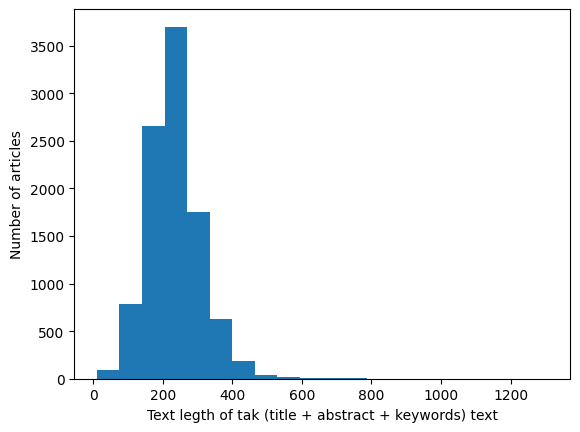

In [ ]:
# the distribution of text length in the title + keywords + abstract
input_path = fpath.poten_litera_db
df = pd.read_csv(input_path, header=None, sep=',')
df.columns = ["INDEX", "DOI", "PMID", "PMCID", "FULL_TEXT_URL", "FULL_TEXT_SOURCE", "PDF_URL", "PDF_SOURCE", "TITLE", "ABSTRACT", "KEYWORDS"]

len_list = []

for ind in df.index:
    text = ""
    num_words = 0

    if df.at[ind, "ABSTRACT"] == df.at[ind, "ABSTRACT"]: # if abstract is available
        abstract = df.at[ind, "ABSTRACT"]
    else: # skip this article if abstract is not available
        continue
    if df.at[ind, "TITLE"] == df.at[ind, "TITLE"]:
        title = df.at[ind, "TITLE"]
    else:
        title = ""
    if df.at[ind, "KEYWORDS"] == df.at[ind, "KEYWORDS"]:
        keywords = df.at[ind, "KEYWORDS"]
    else:
        keywords = ""

    text = title + " " + abstract + " " + keywords
    
    # process the text
    text = text.lower() # convert to lower case
    text = text.encode("ascii", "ignore").decode() # keep only ascii characters
    text = re.sub(r'\s+', ' ', text).strip() # remove extra spaces

    num_words = len(text.split())

    len_list.append(num_words)

# calculate the average and maximum number of words in the text
print("The number of articles considered:", len(len_list))
print("Max of length:", max(len_list))
print("Average length:", np.mean(len_list))
print("Median length:", np.median(len_list))
print("Std of length:", np.std(len_list))

# sort the len_list and draw a histogram
len_list.sort()
plt.hist(len_list, bins=20)
plt.xlabel("Text legth of tak (title + abstract + keywords) text")
plt.ylabel("Number of articles")
plt.show()

In [ ]:
# process the 1000 training-test-set and add more columns of text and information in the training-test-set
input_path = fpath.poten_litera_testing_set_1000
db_path = fpath.poten_litera_db
output_path = fpath.poten_litera_testing_set_1000_text_extract_and_count
plib.clear_file(output_path)

df_1000 = pd.read_csv(input_path, header=0, sep=',')
df_1000.columns = ["INDEX", "DOI", "PMID", "PMCID", "FULL_TEXT_URL", "FULL_TEXT_SOURCE", "PDF_URL", "PDF_SOURCE", "TITLE", "ABSTRACT", "KEYWORDS", "RELEVANCE_INDEX"]

df_db = pd.read_csv(db_path, header=None, sep=',')
df_db.columns = ["INDEX", "DOI", "PMID", "PMCID", "FULL_TEXT_URL", "FULL_TEXT_SOURCE", "PDF_URL", "PDF_SOURCE", "TITLE", "ABSTRACT", "KEYWORDS"]

for ind in df_1000.index:
    index = int(df_1000.at[ind, "INDEX"])
    print("ind:", ind, "index:", index)

    # get the text from the full text
    txt_file_name = str(index) + ".txt"
    txt_path = os.path.join(fpath.text_folder, txt_file_name)

    # extract text
    if os.path.exists(txt_path): # text from full text
        with open(txt_path, 'r') as f:
            text_txt = f.read()
        f.close()
    else:
        text_txt = ""

    text_tak = "" # text from title, abstract, and keywords
    if df_1000.at[ind, "TITLE"] == df_1000.at[ind, "TITLE"]:
        text_tak = text_tak + df_1000.at[ind, "TITLE"] + " "
    else:
        pass
    if df_1000.at[ind, "ABSTRACT"] == df_1000.at[ind, "ABSTRACT"]:
        text_tak = text_tak + df_1000.at[ind, "ABSTRACT"] + " "
    else:
        pass
    if df_1000.at[ind, "KEYWORDS"] == df_1000.at[ind, "KEYWORDS"]:
        text_tak = text_tak + df_1000.at[ind, "KEYWORDS"] + " "
    else:
        pass
    
    # process the text
    text_txt = process_text(text_txt, lower=True)
    text_tak = process_text(text_tak, lower=True)
    text_500 = text_txt.split()[:params.text_length_to_extract]
    
    # count keywords from text
    count_list = [0] * len(params.ranking_kw_groups)
    keys_list = list(params.ranking_kw_groups.keys())
    for i in range(len(count_list)):
        count_list[i] = count_kw_group_from_text(text_tak, text_txt, params.ranking_kw_groups[keys_list[i]])

    # extract sentences from text
    if text_txt == text_txt and text_txt != "": # if full text is available, use full text
        text = text_txt
    else: # if full text is not available, use tak (title + abstract + keywords)
        text = text_tak
    text_list = extract_sent_from_text(text, params.ranking_kw_groups)
    
    # title
    title = df_db.loc[df_db["INDEX"].astype(int) == index, 'TITLE'].values[0]
    if title == title:
        title = process_text(title, lower=False)
    else:
        title = np.nan
    # abstract
    abstract = df_db.loc[df_db["INDEX"].astype(int) == index, 'ABSTRACT'].values[0]
    if abstract == abstract:
        abstract = process_text(abstract, lower=False)
    else:
        abstract = np.nan
    # keywords
    keywords = df_db.loc[df_db["INDEX"].astype(int) == index, 'KEYWORDS'].values[0]
    if keywords == keywords:
        keywords = process_text(keywords, lower=False)
    else:
        keywords = np.nan
    
    # csv columns
    columns = ["INDEX", "DOI", "PMID", "PMCID", "FULL_TEXT_URL", "FULL_TEXT_SOURCE", "PDF_URL", "PDF_SOURCE", 
               "TITLE", "ABSTRACT", "KEYWORDS", 
               "TEXT_500"
    ]
    columns = columns + [key+"_TEXT" for key in params.ranking_kw_groups.keys()] # add keyword group text
    columns = columns + [key+"_COUNT" for key in params.ranking_kw_groups.keys()] # add keyword group count
    columns_to_add = ["TT?(Y/N/MB/NA)", "MACAQUE?(Y/N/MB/NA)", "THALAMUS?(Y/N/MB/NA)", "RELEVANT(Y/N/MB/NA)", "READ_BY(A/D/R)", "COMMENT"] # add columns for documenting labels
    columns = columns + columns_to_add

    # specify rows
    row = {
        "INDEX": [df_1000.at[ind, "INDEX"]],
        "DOI": [df_1000.at[ind, "DOI"]],
        "PMID": [df_1000.at[ind, "PMID"]],
        "PMCID": [df_1000.at[ind, "PMCID"]],
        "FULL_TEXT_URL": [df_1000.at[ind, "FULL_TEXT_URL"]],
        "FULL_TEXT_SOURCE": [df_1000.at[ind, "FULL_TEXT_SOURCE"]],
        "PDF_URL": [df_1000.at[ind, "PDF_URL"]],
        "PDF_SOURCE": [df_1000.at[ind, "PDF_SOURCE"]],
        "TITLE": [title],
        "ABSTRACT": [abstract],
        "KEYWORDS": [keywords],
        "TEXT_500": [text_500]
    }
    # add key value pair of ranking_kw_groups and values in text_group
    i = 0
    for key in params.ranking_kw_groups.keys():
        text_value = text_list[i]
        row[key+"_TEXT"] = [text_value]
        count_value = count_list[i]
        row[key+"_COUNT"] = [count_value]
        i += 1
    for column in columns_to_add:
        row[column] = [np.nan]
    # print(row)

    # save the first row with header
    if ind == 0: # add the first row with header
        df_new_row = pd.DataFrame(data=row, columns=columns)
        df_new_row.to_csv(output_path, mode='w', index=False, header=True, escapechar='\\')
        continue
    if not plib.add_row_to_csv(output_path, row, columns):  # add the rest rows without header and with mode "a"
        print("Error detected when adding a row to csv!")
    
    print("ind:", ind, "index:", index)
    print("\n")

ind: 0 index: 8563
ind: 1 index: 7378
ind: 1 index: 7378


ind: 2 index: 9735
ind: 2 index: 9735


ind: 3 index: 2259
ind: 3 index: 2259


ind: 4 index: 10784
ind: 4 index: 10784


ind: 5 index: 6727
ind: 5 index: 6727


ind: 6 index: 10386
ind: 6 index: 10386


ind: 7 index: 1103
ind: 7 index: 1103


ind: 8 index: 8771
ind: 8 index: 8771


ind: 9 index: 5378
ind: 9 index: 5378


ind: 10 index: 2783
ind: 10 index: 2783


ind: 11 index: 1931
ind: 11 index: 1931


ind: 12 index: 7641
ind: 12 index: 7641


ind: 13 index: 4525
ind: 13 index: 4525


ind: 14 index: 625
ind: 14 index: 625


ind: 15 index: 10105
ind: 15 index: 10105


ind: 16 index: 7122
ind: 16 index: 7122


ind: 17 index: 605
ind: 17 index: 605


ind: 18 index: 9785
ind: 18 index: 9785


ind: 19 index: 1421
ind: 19 index: 1421


ind: 20 index: 3532
ind: 20 index: 3532


ind: 21 index: 8077
ind: 21 index: 8077


ind: 22 index: 5758
ind: 22 index: 5758


ind: 23 index: 619
ind: 23 index: 619


ind: 24 index: 4780
ind: 24 index

In [ ]:
# # read the db_final.csv and scan the rows and count the number of np.nans in the columns Macaque?(Y/N), Thalamus?(Y/N), Inject?(Y/N)
# input_path = fpath.poten_litera_db_text_extract
# df = pd.read_csv(input_path, header=0, sep=',')
# df.columns = ["INDEX", "DOI", "PMID", "PMCID", "FULL_TEXT_URL", "FULL_TEXT_SOURCE", "PDF_URL", "PDF_SOURCE", 
#                "TITLE", "ABSTRACT", "KEYWORDS", 
#                "SPIECIES_TEXT", "THALAM_TEXT", "INJECT_TEXT", 
#                "Macaque?(Y/N)", "Thalamus?(Y/N)", "Inject?(Y/N)"]

# macaque = 0
# thalamus = 0
# inject = 0

# for ind in df.index:
#     if df.at[ind, "SPIECIES_TEXT"] != df.at[ind, "SPIECIES_TEXT"]:
#         macaque += 1
#         print("No macaque in text!")
#         print(df.at[ind, "INDEX"])
#         print(df.at[ind, "FULL_TEXT_URL"])
#         print("\n")
#     if df.at[ind, "THALAM_TEXT"] != df.at[ind, "THALAM_TEXT"]:
#         thalamus += 1
#         print("No thalamus in text!")
#         print(df.at[ind, "INDEX"])
#         print(df.at[ind, "FULL_TEXT_URL"])
#         print("\n")
#     if df.at[ind, "INJECT_TEXT"] != df.at[ind, "INJECT_TEXT"]:
#         inject += 1

# print("Macaque:", macaque)
# print("Thalamus:", thalamus)
# print("Inject:", inject)

In [ ]:
# count keywords and record the count to poten_litera_db_kw_count.csv
input_path = fpath.poten_litera_db
output_path = fpath.poten_litera_db_kw_count

# clear file
plib.clear_file(output_path)

count_and_record(input_path, output_path, params.ranking_kw_groups)

Line number: 1  INDEX: 0
Line number: 2  INDEX: 1
Line number: 3  INDEX: 2
Line number: 4  INDEX: 4
Line number: 5  INDEX: 5
Line number: 6  INDEX: 6
Line number: 7  INDEX: 7
Line number: 8  INDEX: 8
Line number: 9  INDEX: 9
Line number: 10  INDEX: 10
Line number: 11  INDEX: 11
Line number: 12  INDEX: 12
Line number: 13  INDEX: 13
Line number: 14  INDEX: 14
Line number: 15  INDEX: 15
Line number: 16  INDEX: 16
Line number: 17  INDEX: 17
Line number: 18  INDEX: 18
Line number: 19  INDEX: 19
Line number: 20  INDEX: 20
Line number: 21  INDEX: 21
Line number: 22  INDEX: 22
Line number: 23  INDEX: 23
Line number: 24  INDEX: 24
Line number: 25  INDEX: 25
Line number: 26  INDEX: 26
Line number: 27  INDEX: 27
Line number: 28  INDEX: 28
Line number: 29  INDEX: 29
Line number: 30  INDEX: 30
Line number: 31  INDEX: 31
Line number: 32  INDEX: 32
Line number: 33  INDEX: 33
Line number: 34  INDEX: 34
Line number: 35  INDEX: 35
Line number: 36  INDEX: 36
Line number: 37  INDEX: 37
Line number: 38  IN

In [ ]:
# # rank the candidate articles
# input_path = fpath.poten_litera_db_kw_count
# output_path = fpath.poten_litera_db_ranked

# # clear file
# plib.clear_file(output_path)

# rank(input_path, output_path, params.ranking_kw_groups_weights)

In [ ]:
# # read the ranked database and obtain the relevance_index of YESs and NOs 
# # of the test data set and draw a violin plot, and calculate the difference between the two distributions
# # the difference is defined as 1. t-statistic 2. 
# db_ranked_path = fpath.poten_litera_db_ranked
# test_path = fpath.poten_litera_testing_set_1000_read

# df_db_ranked = pd.read_csv(db_ranked_path, header=0, sep=',')
# df_db_ranked.columns = [
#     "INDEX", "DOI", "PMID", "PMCID", "FULL_TEXT_URL", "FULL_TEXT_SOURCE", "PDF_URL", "PDF_SOURCE", 
#     "TITLE", "ABSTRACT", "KEYWORDS", 
#     "SPECIES_RELATED", "TC_CT_RELATED", "THALAM_RELATED", "CORTEX_RELATED", "METHOD_RELATED", "CONNECTIVITY_RELATED",
#     "RELEVANCE_INDEX"]

# df_test = pd.read_csv(test_path, header=0, sep=',')
# df_test.columns = ["INDEX", "DOI", "PMID", "PMCID", "FULL_TEXT_URL", "FULL_TEXT_SOURCE", "PDF_URL", "PDF_SOURCE", "TITLE", "ABSTRACT", "KEYWORDS", "RELEVANT"]

In [ ]:
# # save the counts of the keywords in the respective lists
# relevant_species = []
# relevant_tc_ct = []
# relevant_thalam = []
# relevant_cortex = []
# relevant_method = []
# relevant_connectivity = []

# non_relevant_species = []
# non_relevant_tc_ct = []
# non_relevant_thalam = []
# non_relevant_cortex = []
# non_relevant_method = []
# non_relevant_connectivity = []

# relvant_index = []
# relevant_relevance_index_list = []

# non_relevant_index = []
# non_relevant_relevance_index_list = []

# for ind in df_test.index:
#     index = int(df_test.at[ind, "INDEX"])
#     # print(ind, index)
#     # print(df_db_ranked.loc[df_db_ranked["INDEX"].apply(int) == index, "RELEVANCE_INDEX"].values[0])

#     # if df_test.at[ind, "RELEVANT"] == "YES" and df_db_ranked.loc[df_db_ranked["INDEX"].apply(int) == index, "LENGTH_TEXT"].values[0] > 100:
#     if df_test.at[ind, "RELEVANT"] == "YES":
#         relvant_index.append(index)
#         relevant_relevance_index_list.append(df_db_ranked.loc[df_db_ranked["INDEX"].apply(int) == index, "RELEVANCE_INDEX"].values[0])
#         relevant_species.append(df_db_ranked.loc[df_db_ranked["INDEX"].apply(int) == index, "SPECIES_RELATED"].values[0])
#         relevant_tc_ct.append(df_db_ranked.loc[df_db_ranked["INDEX"].apply(int) == index, "TC_CT_RELATED"].values[0])
#         relevant_thalam.append(df_db_ranked.loc[df_db_ranked["INDEX"].apply(int) == index, "THALAM_RELATED"].values[0])
#         relevant_cortex.append(df_db_ranked.loc[df_db_ranked["INDEX"].apply(int) == index, "CORTEX_RELATED"].values[0])
#         relevant_method.append(df_db_ranked.loc[df_db_ranked["INDEX"].apply(int) == index, "METHOD_RELATED"].values[0])
#         relevant_connectivity.append(df_db_ranked.loc[df_db_ranked["INDEX"].apply(int) == index, "CONNECTIVITY_RELATED"].values[0])
#     # elif df_db_ranked.loc[df_db_ranked["INDEX"].apply(int) == index, "LENGTH_TEXT"].values[0] > 100:
#     else:
#         non_relevant_index.append(index)
#         non_relevant_relevance_index_list.append(df_db_ranked.loc[df_db_ranked["INDEX"].apply(int) == index, "RELEVANCE_INDEX"].values[0])
#         non_relevant_species.append(df_db_ranked.loc[df_db_ranked["INDEX"].apply(int) == index, "SPECIES_RELATED"].values[0])
#         non_relevant_tc_ct.append(df_db_ranked.loc[df_db_ranked["INDEX"].apply(int) == index, "TC_CT_RELATED"].values[0])
#         non_relevant_thalam.append(df_db_ranked.loc[df_db_ranked["INDEX"].apply(int) == index, "THALAM_RELATED"].values[0])
#         non_relevant_cortex.append(df_db_ranked.loc[df_db_ranked["INDEX"].apply(int) == index, "CORTEX_RELATED"].values[0])
#         non_relevant_method.append(df_db_ranked.loc[df_db_ranked["INDEX"].apply(int) == index, "METHOD_RELATED"].values[0])
#         non_relevant_connectivity.append(df_db_ranked.loc[df_db_ranked["INDEX"].apply(int) == index, "CONNECTIVITY_RELATED"].values[0])

In [ ]:
# for i in range(len(relvant_index)):
#     print(relvant_index[i], relevant_relevance_index_list[i])
#     # print(relevant_relevance_index_list)

In [ ]:
# # plot the dot plot of the relevance_index of YESs and NOs of the test data set
# plt.figure(figsize=(10, 5))
# plt.plot(relvant_index, relevant_relevance_index_list, 'ro', label="YES")
# plt.plot(non_relevant_index, non_relevant_relevance_index_list, 'bo', label="NO")
# plt.xlabel("Index")
# plt.ylabel("Relevance Index")
# plt.legend()

# # add labels for the relevant index points
# for i, index in enumerate(relvant_index):
#     plt.text(index, relevant_relevance_index_list[i]+0.1, str(index), color='black', fontsize=10)

# # # add labels for the relevant index points
# # for i, index in enumerate(non_relevant_index):
# #     plt.text(index, non_relevant_relevance_index_list[i], str(index), color='black', fontsize=10)

# plt.show()

In [ ]:
# # plot the 6 dot plots of the species_related, tc_ct_related, thalam_related, cortex_related, method_related, connectivity_related of YESs and NOs of the test data set in 2 rows in the same figure
# plt.figure(figsize=(10, 10))
# plt.subplot(3, 2, 1)
# plt.plot(relvant_index, relevant_species, 'ro', label="YES")
# plt.plot(non_relevant_index, non_relevant_species, 'bo', label="NO")
# plt.xlabel("Index")
# plt.ylabel("Species Related")
# plt.legend()

# plt.subplot(3, 2, 2)
# plt.plot(relvant_index, relevant_tc_ct, 'ro', label="YES")
# plt.plot(non_relevant_index, non_relevant_tc_ct, 'bo', label="NO")
# plt.xlabel("Index")
# plt.ylabel("TC_CT Related")
# plt.legend()

# plt.subplot(3, 2, 3)
# plt.plot(relvant_index, relevant_thalam, 'ro', label="YES")
# plt.plot(non_relevant_index, non_relevant_thalam, 'bo', label="NO")
# plt.xlabel("Index")
# plt.ylabel("Thalam Related")
# plt.legend()

# plt.subplot(3, 2, 4)
# plt.plot(relvant_index, relevant_cortex, 'ro', label="YES")
# plt.plot(non_relevant_index, non_relevant_cortex, 'bo', label="NO")
# plt.xlabel("Index")
# plt.ylabel("Cortex Related")
# plt.legend()

# plt.subplot(3, 2, 5)
# plt.plot(relvant_index, relevant_method, 'ro', label="YES")
# plt.plot(non_relevant_index, non_relevant_method, 'bo', label="NO")
# plt.xlabel("Index")
# plt.ylabel("Method Related")
# plt.legend()

# plt.subplot(3, 2, 6)
# plt.plot(relvant_index, relevant_connectivity, 'ro', label="YES")
# plt.plot(non_relevant_index, non_relevant_connectivity, 'bo', label="NO")
# plt.xlabel("Index")
# plt.ylabel("Connectivity Related")
# plt.legend()

# plt.show()


In [ ]:
# def pick_values_uniformly(data, n):
#     """Pick up `n` values uniformly from `data`."""
#     if n <= 0:
#         return []

#     # Determine the range of the data
#     min_val, max_val = min(data), max(data)

#     threshold = (max_val - min_val) / n / 2

#     # If n is 1, just return the midpoint
#     if n == 1:
#         return [(min_val + max_val) / 2]

#     # Calculate the interval size
#     interval = (max_val - min_val) / (n - 1)

#     # Get the uniform values
#     return [min_val + i * interval for i in range(n)], threshold

# # data = [1, 3, 5, 2, 8, 10, 2]
# n = 5
# density_display_index, thres = pick_values_uniformly(relevant_relevance_index_list + non_relevant_relevance_index_list, n)
# print(density_display_index)

In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Printing the length of lists
# print("Numer of relevant literature:", len(relevant_relevance_index_list))
# print("Number of not relevant literature:", len(non_relevant_relevance_index_list))
# print()

# # Create a DataFrame for plotting
# df = pd.DataFrame({'Relevance Index': relevant_relevance_index_list + non_relevant_relevance_index_list, 
#                    'Label': ['Relevant'] * len(relevant_relevance_index_list) + ['Not Relevant'] * len(non_relevant_relevance_index_list)})

# # Draw the violin plot
# plt.figure(figsize=(10, 6))
# ax = sns.violinplot(x='Label', y='Relevance Index', data=df, bw='scott', cut=0)

# relevance_indices = density_display_index  # Replace with your relevance indices

# threshold = thres  # Adjust this based on your desired range around the relevance index

# for index in relevance_indices:
#     ax.axhline(index, color='gray', linestyle='--')
    
#     for i, label in enumerate(df['Label'].unique()):
#         # Filter data points close to the current relevance index
#         close_points = df[(df['Label'] == label) & (np.abs(df['Relevance Index'] - index) < threshold)]
#         density = len(close_points)
        
#         ax.text(i, index + 0.1, str(density), ha='center', va='center', color='red', fontsize=9)  # adjust the vertical offset (0.1 here) as necessary

# plt.title('Distribution of Relevance Index')
# plt.show()

In [ ]:
# import scipy.stats as stats

# # Check the equality of variances
# var_relevant = np.var(relevant_relevance_index_list)
# var_non_relevant = np.var(non_relevant_relevance_index_list)
# print('Variance of relevant:', var_relevant)
# print('Variance of non-relevant:', var_non_relevant)
# print(var_relevant/var_non_relevant)
# # statistic, p_value = stats.levene(relevant_relevance_index_list, non_relevant_relevance_index_list)

# # # Print the results
# # print('Levene test statistic:', statistic)
# # print('p-value:', p_value)

In [ ]:
# # Calculate the t-statistic and p-value
# t_statistic, p_value = stats.ttest_ind(relevant_relevance_index_list, non_relevant_relevance_index_list)

# # Print the results
# print('t-statistic:', t_statistic)
# print('p-value:', p_value)

<h3> Next step: manually read papers and find all actually related literature </h3>